In [58]:
import sys
sys.path.append("../hyperbolic")
import hyperbolic as hype
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To run an experiment, 
* we sample a realization of white Gaussian noise on the space of analytic signals, 
* we compute its analytic wavelet transform (AWT) using Paul's wavelet, 
* we find the zeros of the scalogram, 
* we plot the signal, its spectrum, and the scalogram.

The code in `examples/example1.py` mimics this exactly.

In [8]:
%run -i '../examples/example1.py'

Figures will be saved in the current folder; file names will contain the id "demo".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.
### Plotting the corresponding realization of white noise.
### Plotting the scalogram.


Now you should have the output as pdf and eps figures in the current folder. Alternately, if your browser allows it, you can view them from this notebook as follows.

In [ ]:
from IPython.display import IFrame
IFrame("scalogram_demo_alpha=0.0.pdf", width=1000, height=400)

## Show the effect of a simple signal

In [52]:
npr.seed(1)
xp = hype.Experiment(alpha=2.0, expId="pytest")
xp.sampleWhiteNoise()

Figures will be saved in the current folder; file names will contain the id "pytest".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=2.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.


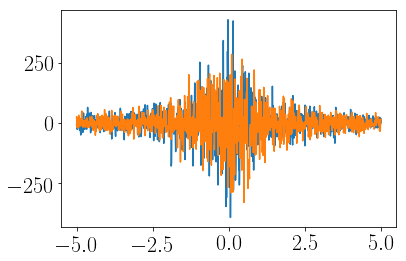

In [53]:
plt.plot(xp.tArray, np.real(xp.signal))
plt.plot(xp.tArray, np.imag(xp.signal))
plt.show()

In [63]:
import laguerre
    
for i, snr in enumerate(np.linspace(0,1000,101)):
    npr.seed(1)
    xp = hype.Experiment(alpha=0.0, expId="frame"+str(i)+"_snr"+str(int(snr)))
    xp.sampleWhiteNoise()
    a = np.zeros(xp.M) # coefficients of signal in the inverse Laguerre basis
    a[3] = snr
    noiselessSignal = np.zeros(xp.tArray.shape, dtype=np.complex)
    for i, s in enumerate(laguerre.IFLaguerreFunctions(xp.M,xp.alpha,xp.tArray)):
        xp.signal += a[i]*s
        noiselessSignal += a[i]*s
    xp.performAWT()
    xp.findZeros()
    xp.plotResults(boolShow=0)
    plt.clf()

Figures will be saved in the current folder; file names will contain the id "frame0_snr0".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame1_snr10".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame2_snr20".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame3_snr30".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame4_snr40".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame5_snr50".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame6_snr60".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame7_snr70".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame8_snr80".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame9_snr90".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame10_snr100".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame11_snr110".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame12_snr120".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame13_snr130".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame14_snr140".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame15_snr150".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame16_snr160".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame17_snr170".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame18_snr180".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame19_snr190".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame20_snr200".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame21_snr210".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame22_snr220".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame23_snr230".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame24_snr240".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame25_snr250".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame26_snr260".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame27_snr270".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame28_snr280".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame29_snr290".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame30_snr300".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame31_snr310".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame32_snr320".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame33_snr330".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame34_snr340".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame35_snr350".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame36_snr360".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame37_snr370".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame38_snr380".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame39_snr390".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame40_snr400".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame41_snr410".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame42_snr420".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame43_snr430".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame44_snr440".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame45_snr450".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame46_snr460".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame47_snr470".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame48_snr480".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame49_snr490".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame50_snr500".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame51_snr510".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame52_snr520".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame53_snr530".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame54_snr540".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame55_snr550".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame56_snr560".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame57_snr570".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame58_snr580".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame59_snr590".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame60_snr600".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame61_snr610".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame62_snr620".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame63_snr630".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame64_snr640".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame65_snr650".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame66_snr660".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame67_snr670".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame68_snr680".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame69_snr690".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame70_snr700".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame71_snr710".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame72_snr720".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame73_snr730".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame74_snr740".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame75_snr750".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame76_snr760".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame77_snr770".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame78_snr780".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame79_snr790".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame80_snr800".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame81_snr810".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame82_snr820".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame83_snr830".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame84_snr840".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame85_snr850".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame86_snr860".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame87_snr870".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame88_snr880".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame89_snr890".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame90_snr900".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame91_snr910".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame92_snr920".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame93_snr930".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame94_snr940".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame95_snr950".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame96_snr960".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame97_snr970".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame98_snr980".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame99_snr990".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Figures will be saved in the current folder; file names will contain the id "frame100_snr1000".
Signals are discretized with N=1024 values, equidistributed along [-A,A], where A=5.
The wavelet parameter is alpha=0.0.
The truncation level for random series is M=1.00E+05.
### Computing truncated random series in the time domain.
### Computing spectrum.
### Plotting the spectrum of the realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the corresponding realization of white noise.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the scalogram.


//anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Plotting the spectrum of the realization of white noise.


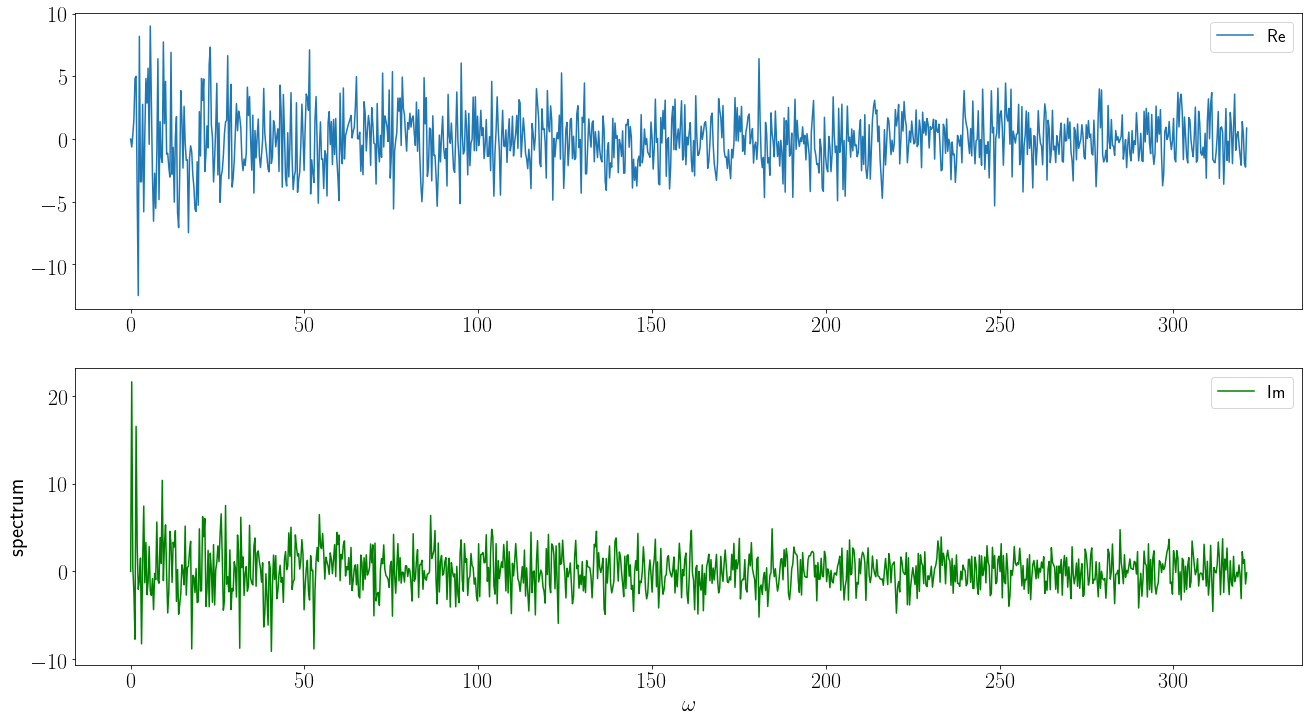

### Plotting the corresponding realization of white noise.


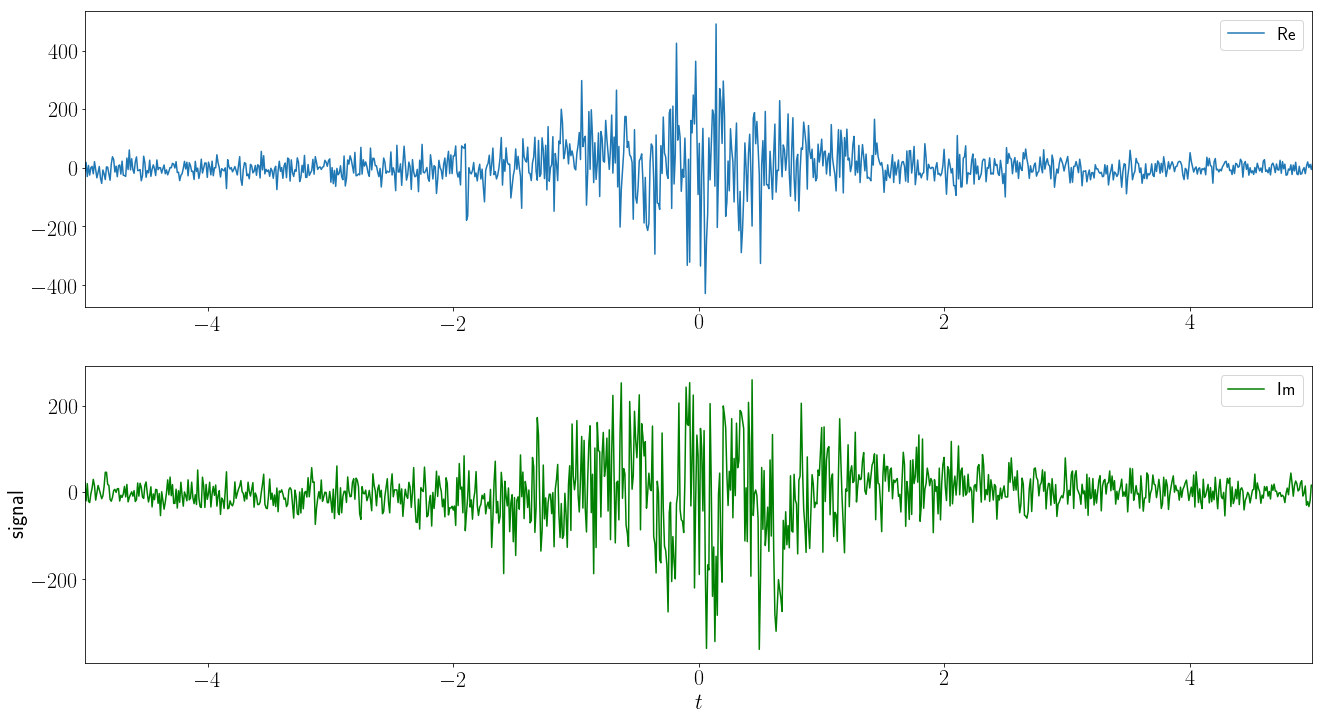

### Plotting the scalogram.


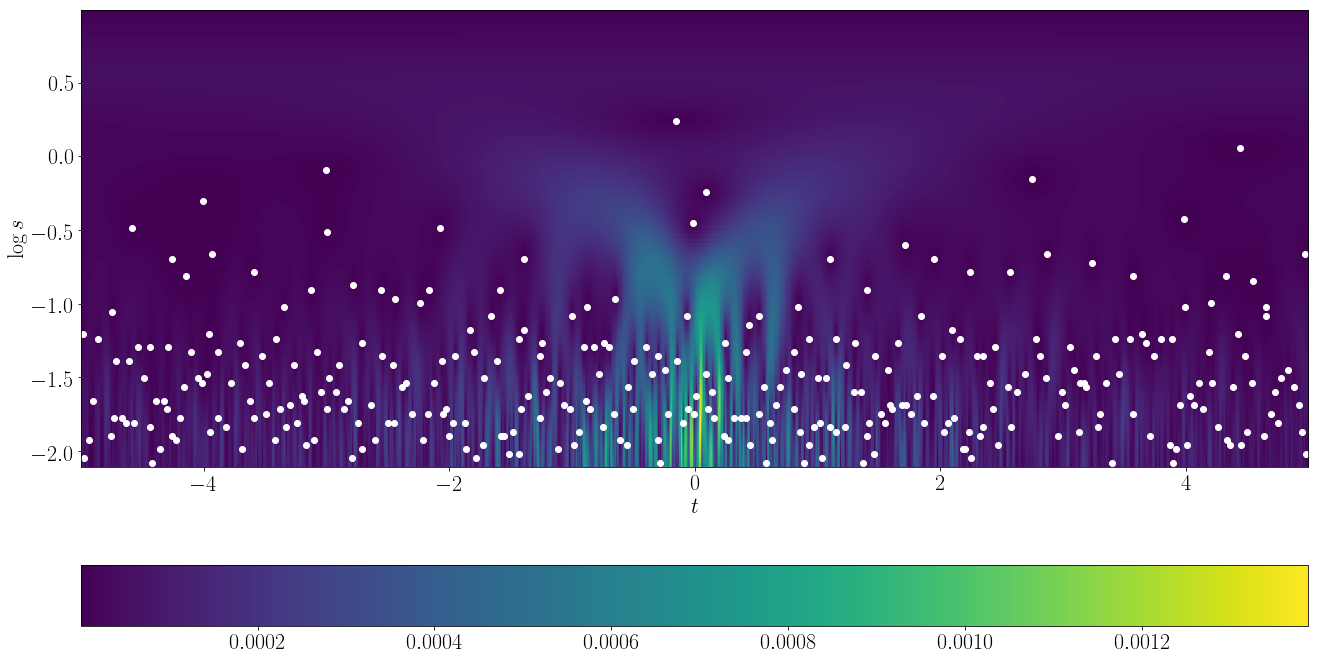

In [55]:
xp.performAWT()
xp.findZeros()
xp.plotResults(boolShow=1)

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


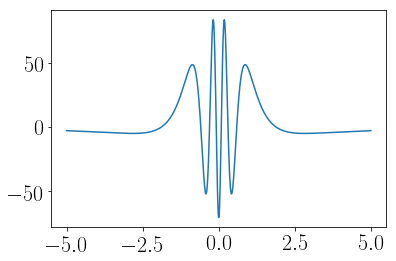

In [56]:
plt.plot(xp.tArray, noiselessSignal)
plt.show()